# Przewidywanie przestepstw przy uzyciu technik Data Mining

Celem projektu jest zbadanie wzorcow, ktore determinuja popelnianie przestepstw wsrod ludnosci zamieszkujacej Stany Zjednoczone. Dane pochodza z Law Enforcement Management and Admin Stats2 w 1990 roku i FBI Uniform Crime Reports z 1995 roku. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/karolina/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
crime = pd.read_csv('unnormalized_crime.csv', sep = ';')

In [3]:
crime.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [4]:
crime.shape

(2215, 147)

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, communityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [6]:
crime.dtypes

communityname          object
state                  object
countyCode             object
communityCode          object
fold                    int64
                        ...  
autoTheftPerPop        object
arsons                 object
arsonsPerPop           object
ViolentCrimesPerPop    object
nonViolPerPop          object
Length: 147, dtype: object

Baza danych zawiera 147 zmiennych i 2215 obserwacji. Do analizy wybralam lacznie 8 zmiennych objasniajacych i 1 zmienna objasniana. Zmienne zostały wybrane na podstawie literatury m.in Beckera (Crime and Punishment: An Economic Approach, Journal of Political Economy, Vol. 76, No. 2, 1968),Cohena (Social change and crime trends: a routine activity approach. American Sociological Review 44 (4): 1979, s. 588−608.), Besci (Economics and Crime in the States, Economic Review – Federal Reserve Bank of Atlanta, Issue Q1 1999, s. 38-56.), Arbia (Spatial econometric modeling of massive datasets: The contribution of data mining, 2013.) i wielu innych.

Wiecej szczegolow dotyczacych wyboru zmiennych przedstawilam w swojej pracy magisterskiej. Jesli chcesz sie dowiedziec wiecej, napisz :)

## Zmienne

Wybrano następujące zmienne, które będą wyjaśniały model: 
- bezrobocie jako procent bezrobocia (PctUnemployed)
- wykształcenie jako procent osób, które ukończyły mniej niż 9 klas (PctLess9thGrade)
- ubóstwo jako procent ludzi zyjacych ponizej poziomu ubostwa (PctPopUnderPov)
- pomoc społeczna jako procent osób pobierających zasiłki (pctWPubAsst)
- wynagrodzenie jako mediana dochodu (medIncome)
- urbanizacja jako liczba osob zamieszkajacych dany region (numbUrban)
- wiek jako procent ludzi pomiedzy 12 a 29 rokiem zycia (agePct12t29)
- rozwody jako procent rozwodow (TotalPctDiv)


Zmienna objaśniająca to liczba przestępstw bez przemocy na 100 tys. mieszkańców (nonViolPerPop). Została ona podziela na 4 poziomy. 

In [7]:
crime2 = crime[['PctUnemployed', 'PctLess9thGrade', 'PctPopUnderPov', 'pctWPubAsst', 'medIncome', 'agePct12t29',
               'numbUrban', 'TotalPctDiv', 'nonViolPerPop']]  

## Wstępne przygotowanie zmiennych

 - usunięcie braków danych 
 - transformacja typów danych

In [8]:
crime2.replace('?', pd.NA, inplace = True)

/var/folders/c5/p24qxq1s42bc6lvvl88m7mnr0000gn/T/ipykernel_1246/2878134802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime2.replace('?', pd.NA, inplace = True)


In [9]:
braki = crime2.isnull().sum()
braki.head(9)

PctUnemployed       0
PctLess9thGrade     0
PctPopUnderPov      0
pctWPubAsst         0
medIncome           0
agePct12t29         0
numbUrban           0
TotalPctDiv         0
nonViolPerPop      97
dtype: int64

In [10]:
crime2 = crime2.dropna(subset = ['nonViolPerPop'])
crime2.isnull().sum()

PctUnemployed      0
PctLess9thGrade    0
PctPopUnderPov     0
pctWPubAsst        0
medIncome          0
agePct12t29        0
numbUrban          0
TotalPctDiv        0
nonViolPerPop      0
dtype: int64

In [11]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2214
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PctUnemployed    2118 non-null   float64
 1   PctLess9thGrade  2118 non-null   float64
 2   PctPopUnderPov   2118 non-null   float64
 3   pctWPubAsst      2118 non-null   float64
 4   medIncome        2118 non-null   int64  
 5   agePct12t29      2118 non-null   float64
 6   numbUrban        2118 non-null   int64  
 7   TotalPctDiv      2118 non-null   float64
 8   nonViolPerPop    2118 non-null   object 
dtypes: float64(6), int64(2), object(1)
memory usage: 165.5+ KB


In [12]:
crime2['nonViolPerPop'] = crime2['nonViolPerPop'].replace('[^\d.]', '', regex = True).astype(float)

/var/folders/c5/p24qxq1s42bc6lvvl88m7mnr0000gn/T/ipykernel_1246/2698881101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime2['nonViolPerPop'] = crime2['nonViolPerPop'].replace('[^\d.]', '', regex = True).astype(float)


In [13]:
crime2.describe()

,PctUnemployed,PctLess9thGrade,PctPopUnderPov,pctWPubAsst,medIncome,agePct12t29,numbUrban,TotalPctDiv,nonViolPerPop
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2.118000e+03,2118.000000,2118.000000
mean,6.036907,9.165033,11.506256,6.758107,34217.611426,27.629528,4.789850e+04,10.805288,4908.241804
std,2.889797,6.705145,8.577574,4.702353,13525.367016,6.192881,2.093691e+05,3.027045,2739.708901
min,1.320000,0.200000,0.640000,0.180000,8866.000000,9.380000,0.000000e+00,2.830000,116.790000
25%,4.042500,4.570000,4.452500,3.270000,23898.500000,24.392500,0.000000e+00,8.530000,2918.070000
50%,5.430000,7.695000,9.145000,5.550000,31700.000000,26.780000,1.795500e+04,10.880000,4425.450000
75%,7.430000,11.780000,16.820000,9.067500,41790.750000,29.210000,4.185000e+04,13.000000,6229.280000
max,31.230000,49.890000,58.000000,44.820000,123625.000000,70.510000,7.322564e+06,22.230000,27119.760000


Powyzsza tabela pokazuje podsumowanie wszystkich atrybutow numerycznych. Dla lepszego zrozumienia danych wygenerujamy jeszcze histogramy dla wszystkich zmiennych.

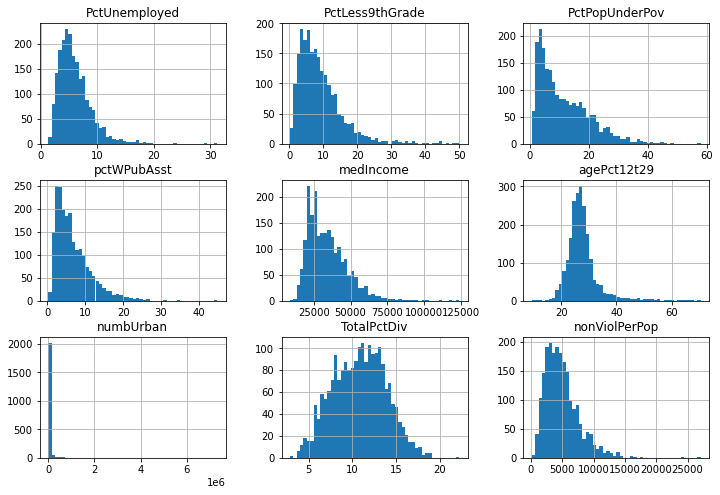

In [14]:
crime2.hist(bins = 50, figsize = (12,8))
plt.show()

Widzimy, ze:
- zmienne maja rozne skale, nieraz znacznie zrownicowane (procenty itp.) 
- zmienna numbUrban wymaga dokladniejszej analizy
- wiele histogramow cechuja sie prawoskosnoscia, czyli rozciagaja sie one bardziej po prawej strony niz po lewej.    Moze to utrudniac niektorym algorytmom rozpoznawanie wzorcow. 

Ze wstepnej analizy danych wynika, ze zmienne wymagaja skalowania oraz ze zmienna numbUrban wymaga zbadania.

<AxesSubplot:xlabel='numbUrban'>

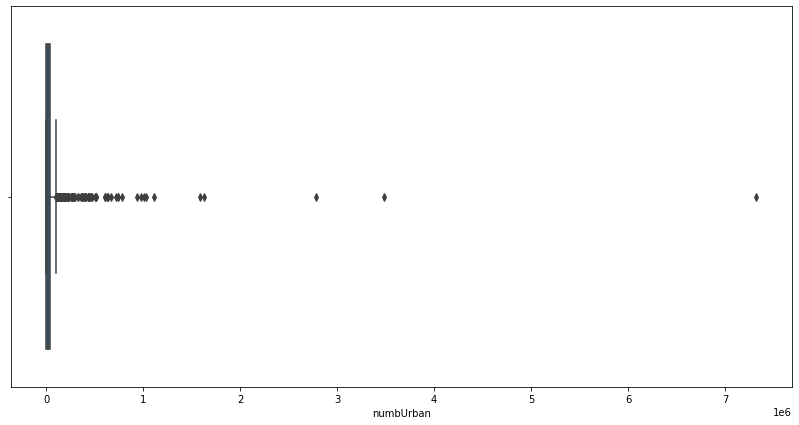

In [15]:
plt.figure(figsize=(14,7))
sns.boxplot(x = 'numbUrban', data = crime2)

In [16]:
crime.sort_values(by='numbUrban', ascending = False)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
21,NewYorkcity,NY,?,?,1,7322564,2.60,28.71,52.26,7.00,...,99207,1355.37,235132,3212.39,112464,1536.49,4443,60.7,2097.71,6164.95
127,LosAngelescity,CA,?,?,1,3485398,2.86,13.99,52.83,9.81,...,50232,1449.19,119092,3435.8,59764,1724.19,5119,147.68,2414.77,6756.86
1434,Chicagocity,IL,31,14000,7,2783726,2.72,39.07,45.39,3.74,...,45670,1660.84,121314,4411.72,40438,1470.57,1676,60.95,?,7604.09
818,Houstoncity,TX,?,?,4,1630553,2.64,28.09,52.69,4.12,...,27022,1558.06,61569,3550.01,27519,1586.72,1549,89.31,?,6784.1
55,Philadelphiacity,PA,101,60000,1,1585577,2.63,39.86,53.52,2.74,...,15117,988.14,39181,2561.1,23785,1554.73,2282,149.17,1279.6,5253.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,McMinnvillecity,TN,?,?,4,11194,2.36,4.96,93.83,0.65,...,195,1586.91,472,3841.15,102,830.08,9,73.24,1000.98,6331.38
857,CapeGirardeaucity,MO,?,?,4,34438,2.56,8.05,90.21,1.29,...,266,733.81,1757,4847.03,111,306.22,2,5.52,331.04,5892.58
1720,Conroecity,TX,?,?,8,27610,2.76,13.40,74.46,0.91,...,378,1201.11,1799,5716.37,266,845.22,5,15.89,1404.47,7778.59
856,LakeCitycity,FL,?,?,4,10005,2.56,38.46,60.07,0.84,...,275,2698.99,993,9745.8,56,549.61,3,29.44,2119.93,13023.85


In [17]:
crime2.sort_values(by='numbUrban', ascending = False)

,PctUnemployed,PctLess9thGrade,PctPopUnderPov,pctWPubAsst,medIncome,agePct12t29,numbUrban,TotalPctDiv,nonViolPerPop
21,8.98,14.10,19.29,13.12,29823,27.46,7322564,11.77,6164.95
127,8.34,18.40,18.86,10.68,30925,31.22,3485398,12.26,6756.86
1434,11.32,15.27,21.62,14.36,26301,29.66,2783726,12.99,7604.09
818,8.18,14.21,20.74,7.06,26261,30.53,1630672,15.07,6784.10
55,9.62,11.29,20.27,13.98,24603,28.02,1585577,12.53,5253.14
...,...,...,...,...,...,...,...,...,...
856,8.15,13.46,24.78,14.08,18619,24.50,0,16.38,13023.85
855,5.75,10.60,17.05,6.77,24712,34.11,0,15.16,11255.20
1727,3.94,15.87,11.72,7.67,22146,25.06,0,9.93,2617.09
852,4.31,11.71,15.58,9.11,24081,25.94,0,12.48,9154.85


Zmienna NumbUrban ma duzo wartosci odstajacych ale sa to poprawne wartosci wynikajace z duzej liczebnosci wielkich miast w USA.

In [18]:
corr_matrix = crime2.corr()
corr_matrix["nonViolPerPop"].sort_values(ascending = False)

nonViolPerPop      1.000000
TotalPctDiv        0.605817
PctPopUnderPov     0.518953
pctWPubAsst        0.474557
PctUnemployed      0.408442
PctLess9thGrade    0.303679
numbUrban          0.121541
agePct12t29        0.112603
medIncome         -0.473101
Name: nonViolPerPop, dtype: float64

<AxesSubplot:>

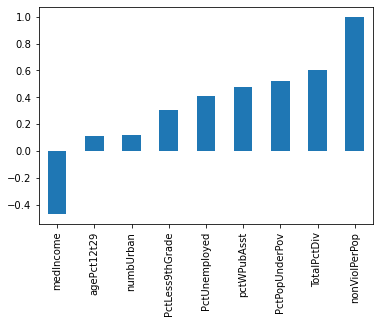

In [19]:
corr_matrix["nonViolPerPop"].sort_values().plot(kind = 'bar')

Z korelacji wynika,że największy pozytywny wpływ na przestępczość ma wskaźnik rozwodów, wskaźnik ubóstwa, pomocy społecznej, bezrobocie, niepełne wykształcenie,  wskaźnik urbanizacji i wiek. Natomiast negatywny wpływ na przestępczość ma dochód.

# Skalowanie zmiennej

In [20]:
crime2 = np.sqrt(crime2)
crime2 = np.round(crime2, 5)

In [21]:
crime2.describe()

,PctUnemployed,PctLess9thGrade,PctPopUnderPov,pctWPubAsst,medIncome,agePct12t29,numbUrban,TotalPctDiv,nonViolPerPop
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000
mean,2.395696,2.855605,3.160779,2.459677,181.723063,5.228516,150.349796,3.252775,67.544266
std,0.545609,1.005500,1.231440,0.841684,34.567385,0.540634,159.076680,0.474180,18.605841
min,1.148910,0.447210,0.800000,0.424260,94.159440,3.062680,0.000000,1.682260,10.806940
25%,2.010600,2.137760,2.110093,1.808310,154.591385,4.938875,0.000000,2.920620,54.019163
50%,2.330240,2.773985,3.024065,2.355840,178.044940,5.174940,133.996190,3.298480,66.524055
75%,2.725800,3.432200,4.101220,3.011225,204.427853,5.404630,204.572725,3.605550,78.925787
max,5.588380,7.063290,7.615770,6.694770,351.603470,8.397020,2706.023650,4.714870,164.680780


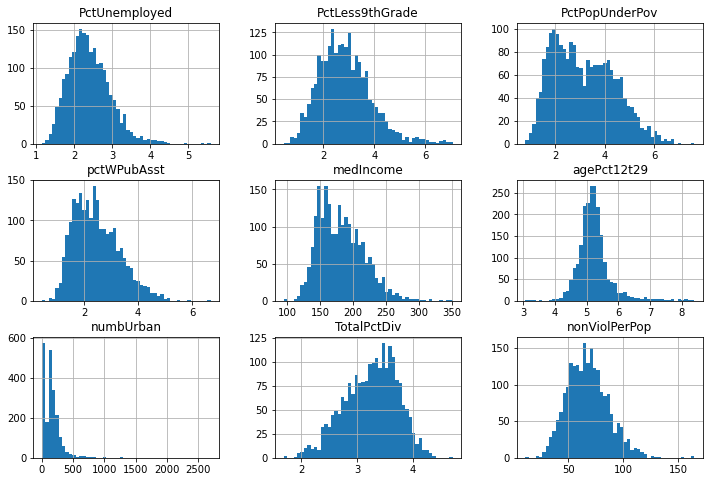

In [22]:
crime2.hist(bins = 50, figsize = (12,8))
plt.show()

# Kategoryzacja zmiennej y

In [23]:
crime2['nonViolPerPop'].describe()

count    2118.000000
mean       67.544266
std        18.605841
min        10.806940
25%        54.019163
50%        66.524055
75%        78.925787
max       164.680780
Name: nonViolPerPop, dtype: float64

In [24]:
crime2['nonViolPerPop_cat'] = pd.cut(crime2['nonViolPerPop'],
                                    bins = [10.807, 54.0192, 66.524, 78.926, np.inf],
                                    labels = [1,2,3,4])

In [25]:
crime2['nonViolPerPop_cat'].value_counts()

4    530
1    529
2    529
3    529
Name: nonViolPerPop_cat, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
crime2

,PctUnemployed,PctLess9thGrade,PctPopUnderPov,pctWPubAsst,medIncome,agePct12t29,numbUrban,TotalPctDiv,nonViolPerPop,nonViolPerPop_cat
0,1.64317,2.41039,1.40000,1.01489,274.08393,4.63033,109.45319,2.11424,37.34421,1
1,1.55885,2.36854,1.99499,1.65831,218.89952,4.61519,152.06249,2.32809,44.22612,1
2,2.00250,1.67332,2.17945,1.71464,188.86238,5.08724,171.30090,3.54260,78.53350,3
4,3.01330,3.48569,5.47631,3.34813,131.87115,6.36632,0.00000,3.11929,99.94393,4
5,2.39165,2.95973,4.21663,2.66833,146.89112,5.73498,374.82529,3.61109,82.86990,4
...,...,...,...,...,...,...,...,...,...,...
2210,3.16070,4.13763,5.00600,4.46990,157.24821,5.49181,237.09914,3.65240,85.77202,4
2211,2.81069,3.53695,4.55961,2.97489,142.55174,5.58838,110.68424,3.71080,76.31802,3
2212,2.27596,2.79643,2.74955,3.00167,164.86965,4.57821,181.17395,3.35112,68.22170,3
2213,3.48138,4.93660,5.50636,3.61248,141.06382,5.47814,0.00000,3.53270,73.08126,3


In [28]:
crime2 = crime2.dropna(subset = ['nonViolPerPop_cat'])
crime2.isnull().sum()

PctUnemployed        0
PctLess9thGrade      0
PctPopUnderPov       0
pctWPubAsst          0
medIncome            0
agePct12t29          0
numbUrban            0
TotalPctDiv          0
nonViolPerPop        0
nonViolPerPop_cat    0
dtype: int64

In [29]:
X = crime2.drop(['nonViolPerPop', 'nonViolPerPop_cat'], axis = 1)
y = crime2['nonViolPerPop_cat']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Regresja logistyczna

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
lm = LinearRegression()
linear_reg = lm.fit(X_train, y_train)
linreg_pred= lm.predict(X_test)

In [33]:
lin_rmse = mean_squared_error(y_test, linreg_pred)
lin_rmse

0.6175842891442818

In [34]:
r2_value = r2_score(y_test, linreg_pred)
r2_value

0.4993739937360113

In [35]:
cdf = pd.DataFrame(linear_reg.coef_, X.columns, columns = ['Coeff'])
cdf.sort_values(by = 'Coeff')

,Coeff
PctUnemployed,-0.111742
pctWPubAsst,-0.090894
agePct12t29,-0.078118
numbUrban,0.001061
medIncome,0.002758
PctLess9thGrade,0.032699
PctPopUnderPov,0.486748
TotalPctDiv,1.000824


Model regresji logistycznej wykazał błąd średniokwadratowy na poziomie 0.617584, natomiast R^2 wynioslo 0.49937. 
Jeśli chodzi o współczynniki przy zmiennych to pozytywny wpływ mają poziom rozwodów, wskaźnik ubóstwa, wykształcenie, dochód i poziom urbanizacji, jednakże negatywny wpływ mają młody wiek, poziom pomocy społecznej i bezrobocie.

Podsumowywując poziom rozwodów, wskaźnik ubóstwa, wykształcenie, dochód i poziom urbanizacji  mają oczekiwany taki sam pozytywny wpływ na przestępczość jak wynikało wcześniej z korelacji.
Zaskakującymi zmiennych które według korelacji miały dodatnio wpływ na przestępczość, a z regresja liniowa wykazała, że mają ujemny wpływ to wiek, poziom pomocy społecznej i bezrobocie.

## Drzewa decyzyjne

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tr = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5, min_samples_leaf=20)
tree_reg = tr.fit(X_train, y_train)
treereg_pred = tr.predict(X_test)

In [38]:
tr_rmse = mean_squared_error(y_test,treereg_pred)
tr_rmse

0.6334301980021543

In [39]:
r2_value = r2_score(y_test, treereg_pred)
r2_value

0.4865289874646703

Błąd średniokwadatowy zwiększył się w drzewach decyzyjnych. Przy użyciu metody feature importance sprawdzę, która zmienna wykazała najmniejszą istotność.

In [40]:
tree_feat = pd.DataFrame(tr.feature_importances_, X.columns, columns = ['feat_import'])
tree_feat.sort_values(by = 'feat_import', ascending=False)

,feat_import
TotalPctDiv,0.666886
PctPopUnderPov,0.229922
numbUrban,0.055621
PctUnemployed,0.019085
agePct12t29,0.010512
medIncome,0.008053
PctLess9thGrade,0.007509
pctWPubAsst,0.002413


In [41]:
X2 = crime2.drop(['pctWPubAsst','nonViolPerPop_cat','nonViolPerPop'], axis = 1)
X2_train, X2_test, y_train, y_test = train_test_split(X2,y, test_size = 0.2, random_state=42)

In [42]:
tr2 = DecisionTreeRegressor()
tree_reg2 = tr2.fit(X2_train, y_train)
treereg_pred2 = tr2.predict(X2_test)

In [43]:
tr_rmse2 = mean_squared_error(y_test,treereg_pred2)
tr_rmse2

1.195754716981132

In [44]:
r2_value = r2_score(y_test, treereg_pred2)
r2_value

0.03069764086285287

In [45]:
tree_feat2 = pd.DataFrame(tr2.feature_importances_, X2.columns, columns = ['feat_import2'])

In [46]:
tree_feat2['feat_import'] = tr2.feature_importances_

tree_feat2.sort_values(by = 'feat_import2', ascending=False)

,feat_import2,feat_import
TotalPctDiv,0.434889,0.434889
PctPopUnderPov,0.206292,0.206292
numbUrban,0.076508,0.076508
PctLess9thGrade,0.074163,0.074163
medIncome,0.074133,0.074133
agePct12t29,0.067602,0.067602
PctUnemployed,0.066413,0.066413


## Lasy losowe

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor(max_depth = 5, min_samples_leaf=20)
random_forest = rfr.fit(X_train, y_train)
randfor_pred = rfr.predict(X_test)

In [49]:
rfr_rmse = mean_squared_error(y_test,randfor_pred)
rfr_rmse

0.5942306085400672

In [50]:
r2_value = r2_score(y_test, randfor_pred)
r2_value

0.5183049478712797

In [51]:
randfor_feat = pd.DataFrame(rfr.feature_importances_, X.columns, columns = ['feat_import'])
randfor_feat.sort_values(by = 'feat_import', ascending=False)

,feat_import
TotalPctDiv,0.548012
PctPopUnderPov,0.326949
numbUrban,0.054583
agePct12t29,0.025128
PctUnemployed,0.013051
pctWPubAsst,0.011399
medIncome,0.011198
PctLess9thGrade,0.009680


Lasy losowe mają średni błąd kwadratowy na poziomie 0,6036, drzewa decyzyjne miały 1,16 a regresja liniowa miała 0.61. 
Po sprawdzeniu istotności zmiennych w lasach losowych, zdecydowałam o usnięciu zmiennej poziom pomocy społecznej.

In [52]:
X2 = crime2.drop(['pctWPubAsst','nonViolPerPop_cat','nonViolPerPop'], axis = 1)
X2_train, X2_test, y_train, y_test = train_test_split(X2,y, test_size = 0.2, random_state=42)

In [53]:
rfr2 = RandomForestRegressor()
random_forest2 = rfr2.fit(X2_train, y_train)
randfor_pred2 = rfr2.predict(X2_test)

In [54]:
rfr_rmse2 = mean_squared_error(y_test,randfor_pred2)
rfr_rmse2

0.6126620283018868

In [55]:
r2_value = r2_score(y_test, randfor_pred2)
r2_value

0.5033640754635309

In [56]:
randfor_feat2 = pd.DataFrame(rfr2.feature_importances_, X2.columns, columns = ['feat_import2'])
randfor_feat2.sort_values(by = 'feat_import2', ascending=False)

,feat_import2
TotalPctDiv,0.371223
PctPopUnderPov,0.268113
agePct12t29,0.080392
numbUrban,0.073710
PctUnemployed,0.070379
medIncome,0.070222
PctLess9thGrade,0.065961


# Usuwam wykształcenie

In [57]:
X3 = crime2.drop(['PctLess9thGrade','pctWPubAsst','nonViolPerPop_cat', 'nonViolPerPop'], axis = 1)
X3_train, X3_test, y_train, y_test = train_test_split(X3,y, test_size = 0.2, random_state=42)

In [58]:
rfr3 = RandomForestRegressor()
random_forest3 = rfr3.fit(X3_train, y_train)
randfor_pred3 = rfr3.predict(X3_test)

In [59]:
rfr_rmse3 = mean_squared_error(y_test,randfor_pred3)
rfr_rmse3

0.620642216981132

In [60]:
r2_value = r2_score(y_test, randfor_pred3)
r2_value

0.49689517711564846

In [61]:
randfor_feat3 = pd.DataFrame(rfr3.feature_importances_, X3.columns, columns = ['feat_import3'])
randfor_feat3.sort_values(by = 'feat_import3', ascending=False)

,feat_import3
TotalPctDiv,0.382294
PctPopUnderPov,0.281589
agePct12t29,0.092666
numbUrban,0.084141
medIncome,0.082259
PctUnemployed,0.077051


Metoda usuwania zmiennych nie zmnienia skuteczności modelu.

In [62]:
import tensorflow as tf

2024-03-23 21:00:37.786867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Pierwszy model NN

In [64]:
model1 = Sequential()

model1.add(Dense(50,activation='relu'))
model1.add(Dense(25,activation='relu'))
model1.add(Dense(10,activation='relu'))


model1.add(Dense(1))

model1.compile(optimizer='rmsprop',loss='mse')

In [65]:
model1.fit(x = X_train, y = y_train, epochs = 100, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/100
14/14 [==============================] - 1s 25ms/step - loss: 40.1892 - val_loss: 2.7753
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 10.2400 - val_loss: 1.9746
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 9.3977 - val_loss: 5.3067
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 8.7589 - val_loss: 3.6405
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 8.8339 - val_loss: 3.1632
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 12.0803 - val_loss: 1.0395
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 6.7633 - val_loss: 3.8100
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 8.4330 - val_loss: 9.3471
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 9.8556 - val_loss: 2.2581
Epoch 10/100
14/14 [==============================] - 0s 7ms/step - loss: 9.1247 - val_loss: 20.8242
Epoc

Epoch 83/100
14/14 [==============================] - 0s 6ms/step - loss: 1.6019 - val_loss: 1.8272
Epoch 84/100
14/14 [==============================] - 0s 8ms/step - loss: 1.6501 - val_loss: 2.4752
Epoch 85/100
14/14 [==============================] - 0s 7ms/step - loss: 1.8386 - val_loss: 1.6246
Epoch 86/100
14/14 [==============================] - 0s 8ms/step - loss: 1.7500 - val_loss: 1.0943
Epoch 87/100
14/14 [==============================] - 0s 7ms/step - loss: 1.6618 - val_loss: 0.9637
Epoch 88/100
14/14 [==============================] - 0s 6ms/step - loss: 1.7838 - val_loss: 0.9256
Epoch 89/100
14/14 [==============================] - 0s 6ms/step - loss: 1.5521 - val_loss: 2.0445
Epoch 90/100
14/14 [==============================] - 0s 7ms/step - loss: 1.3530 - val_loss: 1.9722
Epoch 91/100
14/14 [==============================] - 0s 5ms/step - loss: 1.7270 - val_loss: 1.2440
Epoch 92/100
14/14 [==============================] - 0s 6ms/step - loss: 1.8229 - val_loss: 1.3891


In [66]:
loss1= pd.DataFrame(model1.history.history)

<AxesSubplot:>

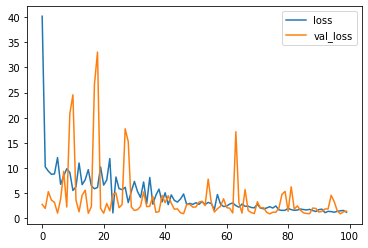

In [67]:
loss1.plot()

In [68]:
nn1_pred = model1.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [69]:
nn1_rmse = mean_squared_error(y_test,nn1_pred)
nn1_rmse

1.4213033710017797

In [70]:
r2_value = r2_score(y_test, nn1_pred)
r2_value

-0.15213654689964584

# Model 2 z optymalizatorem Adam

In [71]:
model2 = Sequential()

model2.add(Dense(50,activation='relu'))
model2.add(Dense(25,activation='relu'))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(3,activation='relu'))

model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')

In [72]:
model2.fit(x=X_train,y=y_train, 
          validation_data = (X_test, y_test),
          batch_size=128, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 26.6116 - val_loss: 6.2097
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 2.3966 - val_loss: 2.2346
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 1.8264 - val_loss: 1.7995
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 1.5090 - val_loss: 1.5912
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 1.3817 - val_loss: 1.5638
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 1.3324 - val_loss: 1.3771
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 1.3138 - val_loss: 1.3141
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 1.2556 - val_loss: 1.2621
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 1.2234 - val_loss: 1.1997
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 1.2007 - val_loss: 1.1427
Epoch 1

Epoch 83/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7260 - val_loss: 0.7029
Epoch 84/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7088 - val_loss: 0.7072
Epoch 85/100
14/14 [==============================] - 0s 6ms/step - loss: 0.7223 - val_loss: 0.7001
Epoch 86/100
14/14 [==============================] - 0s 6ms/step - loss: 0.7102 - val_loss: 0.6874
Epoch 87/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7158 - val_loss: 0.6874
Epoch 88/100
14/14 [==============================] - 0s 6ms/step - loss: 0.7231 - val_loss: 0.7271
Epoch 89/100
14/14 [==============================] - 0s 5ms/step - loss: 0.7205 - val_loss: 0.6859
Epoch 90/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6975 - val_loss: 0.6711
Epoch 91/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6935 - val_loss: 0.6866
Epoch 92/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6937 - val_loss: 0.7089


In [73]:
loss2 = pd.DataFrame(model2.history.history)

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

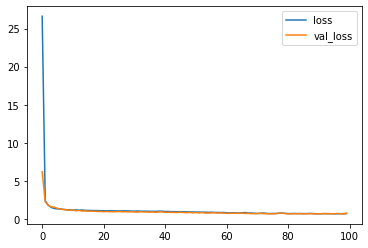

In [74]:
plt.figure(figsize=(10,5))
loss2.plot()

In [75]:
nn2_pred = model2.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [76]:
nn2_rmse = mean_squared_error(y_test,nn2_pred)
nn2_rmse

0.7607342335649074

In [77]:
r2_value =r2_score(y_test, nn2_pred)
r2_value

0.3833338252409424

# Model 3 z optymalizatorem Adam i dropout

In [78]:
from tensorflow.keras.layers import Dropout

In [79]:
model3 = Sequential()

model3.add(Dense(50,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(25,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10,activation='relu'))
model3.add(Dropout(0.5))


model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mse')

In [80]:
model3.fit(x=X_train,y=y_train, 
          validation_data = (X_test, y_test),
          batch_size=128, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 17866.1719 - val_loss: 1567.5496
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 5797.5117 - val_loss: 344.4195
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 2718.3792 - val_loss: 75.9114
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 2565.7661 - val_loss: 14.0788
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 1645.6274 - val_loss: 21.9671
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 1129.5237 - val_loss: 28.2304
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 884.8504 - val_loss: 26.3251
Epoch 8/100
14/14 [==============================] - 0s 10ms/step - loss: 752.1830 - val_loss: 27.2540
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 791.0123 - val_loss: 26.8554
Epoch 10/100
14/14 [==============================] - 0s 10ms/step - 

14/14 [==============================] - 0s 5ms/step - loss: 17.8618 - val_loss: 4.1664
Epoch 82/100
14/14 [==============================] - 0s 6ms/step - loss: 18.9092 - val_loss: 4.0302
Epoch 83/100
14/14 [==============================] - 0s 6ms/step - loss: 14.2399 - val_loss: 3.9779
Epoch 84/100
14/14 [==============================] - 0s 6ms/step - loss: 13.1242 - val_loss: 3.9329
Epoch 85/100
14/14 [==============================] - 0s 7ms/step - loss: 13.4478 - val_loss: 3.8795
Epoch 86/100
14/14 [==============================] - 0s 6ms/step - loss: 11.0799 - val_loss: 3.8360
Epoch 87/100
14/14 [==============================] - 0s 6ms/step - loss: 30.3415 - val_loss: 3.9310
Epoch 88/100
14/14 [==============================] - 0s 7ms/step - loss: 25.0574 - val_loss: 3.9673
Epoch 89/100
14/14 [==============================] - 0s 10ms/step - loss: 10.3270 - val_loss: 3.9027
Epoch 90/100
14/14 [==============================] - 0s 10ms/step - loss: 11.7751 - val_loss: 3.8063
E

In [81]:
loss3 = pd.DataFrame(model3.history.history)

<AxesSubplot:>

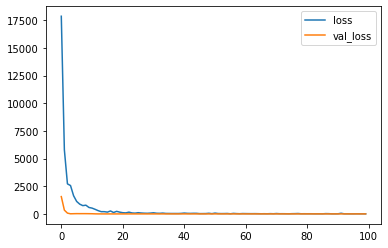

In [82]:
loss3.plot()

In [83]:
nn3_pred = model3.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [84]:
nn3_rmse = mean_squared_error(y_test,nn3_pred)

In [85]:
nn3_rmse

3.609731222565619

In [86]:
r2_value = r2_score(y_test, nn3_pred)
r2_value

-1.926119328818071

# Model 4 z wieksza iloscia neuronow nr 2, opt = adam

In [87]:
model4 = Sequential()

model4.add(Dense(200,activation='relu'))
model4.add(Dense(100,activation='relu'))
model4.add(Dense(50,activation='relu'))
model4.add(Dense(25,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(3,activation='relu'))


model4.add(Dense(1))

model4.compile(optimizer='adam',loss='mse')

In [88]:
model4.fit(x=X_train,y=y_train, 
          validation_data = (X_test, y_test),
          batch_size=128, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 4.1436 - val_loss: 2.2125
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 1.3826 - val_loss: 1.2868
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 1.2859 - val_loss: 1.1585
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 1.2451 - val_loss: 1.2017
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 1.2427 - val_loss: 1.1704
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 1.1921 - val_loss: 1.0525
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 1.1474 - val_loss: 1.0381
Epoch 8/100
14/14 [==============================] - 0s 8ms/step - loss: 1.0868 - val_loss: 1.0763
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 1.0519 - val_loss: 1.0569
Epoch 10/100
14/14 [==============================] - 0s 9ms/step - loss: 1.0538 - val_loss: 1.1366
Epoch

14/14 [==============================] - 0s 6ms/step - loss: 0.6732 - val_loss: 0.6958
Epoch 83/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6883 - val_loss: 0.6764
Epoch 84/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6730 - val_loss: 0.7707
Epoch 85/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6907 - val_loss: 0.7398
Epoch 86/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6963 - val_loss: 0.7330
Epoch 87/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7163 - val_loss: 0.7805
Epoch 88/100
14/14 [==============================] - 0s 6ms/step - loss: 0.7321 - val_loss: 0.7164
Epoch 89/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6705 - val_loss: 0.7130
Epoch 90/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6820 - val_loss: 0.7516
Epoch 91/100
14/14 [==============================] - 0s 8ms/step - loss: 0.7080 - val_loss: 0.6920
Epoch 92/100


In [89]:
loss4 = pd.DataFrame(model4.history.history)

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

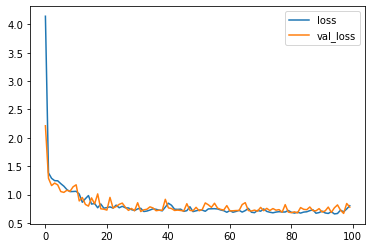

In [90]:
plt.figure(figsize=(10,5))
loss4.plot()

In [91]:
nn4_pred = model4.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [92]:
nn4_rmse = mean_squared_error(y_test,nn4_pred)
nn4_rmse

0.7774248380197302

In [93]:
r2_value = r2_score(y_test, nn4_pred)
r2_value

0.36980409205759424

# Wnioski

Najlepszym modelem, który wykazywał skuteczność na poziomie ponad 50 % były lasy losowe. Sieci neuronowe pomimo zmian parametrów nie wykazały zbyt dobrej skuteczności. Drzewa decyzyjne i lasy losowe okreslały podobny błąd i podobne dopasowanie. 

W przyszłości planuje poprawić model wykorzystując np. biblioteki XBoost lub LightGBM.